## SCIP example

In [1]:
from optiwindnet.importer import load_repository
from optiwindnet.svg import svgplot
from optiwindnet.mesh import make_planar_embedding
from optiwindnet.interarraylib import G_from_S
from optiwindnet.heuristics import EW_presolver
from optiwindnet.MILP import pyomo as omo
from optiwindnet.pathfinding import PathFinder

In [2]:
from pyomo import environ as pyo

### Initialize Sheringham Shoal

In [3]:
sciper = pyo.SolverFactory('scip')
sciper.available(), type(sciper)

(False, pyomo.solvers.plugins.solvers.SCIPAMPL.SCIPAMPL)

In [4]:
locations = load_repository()

In [5]:
L = locations.sheringham
capacity = 6

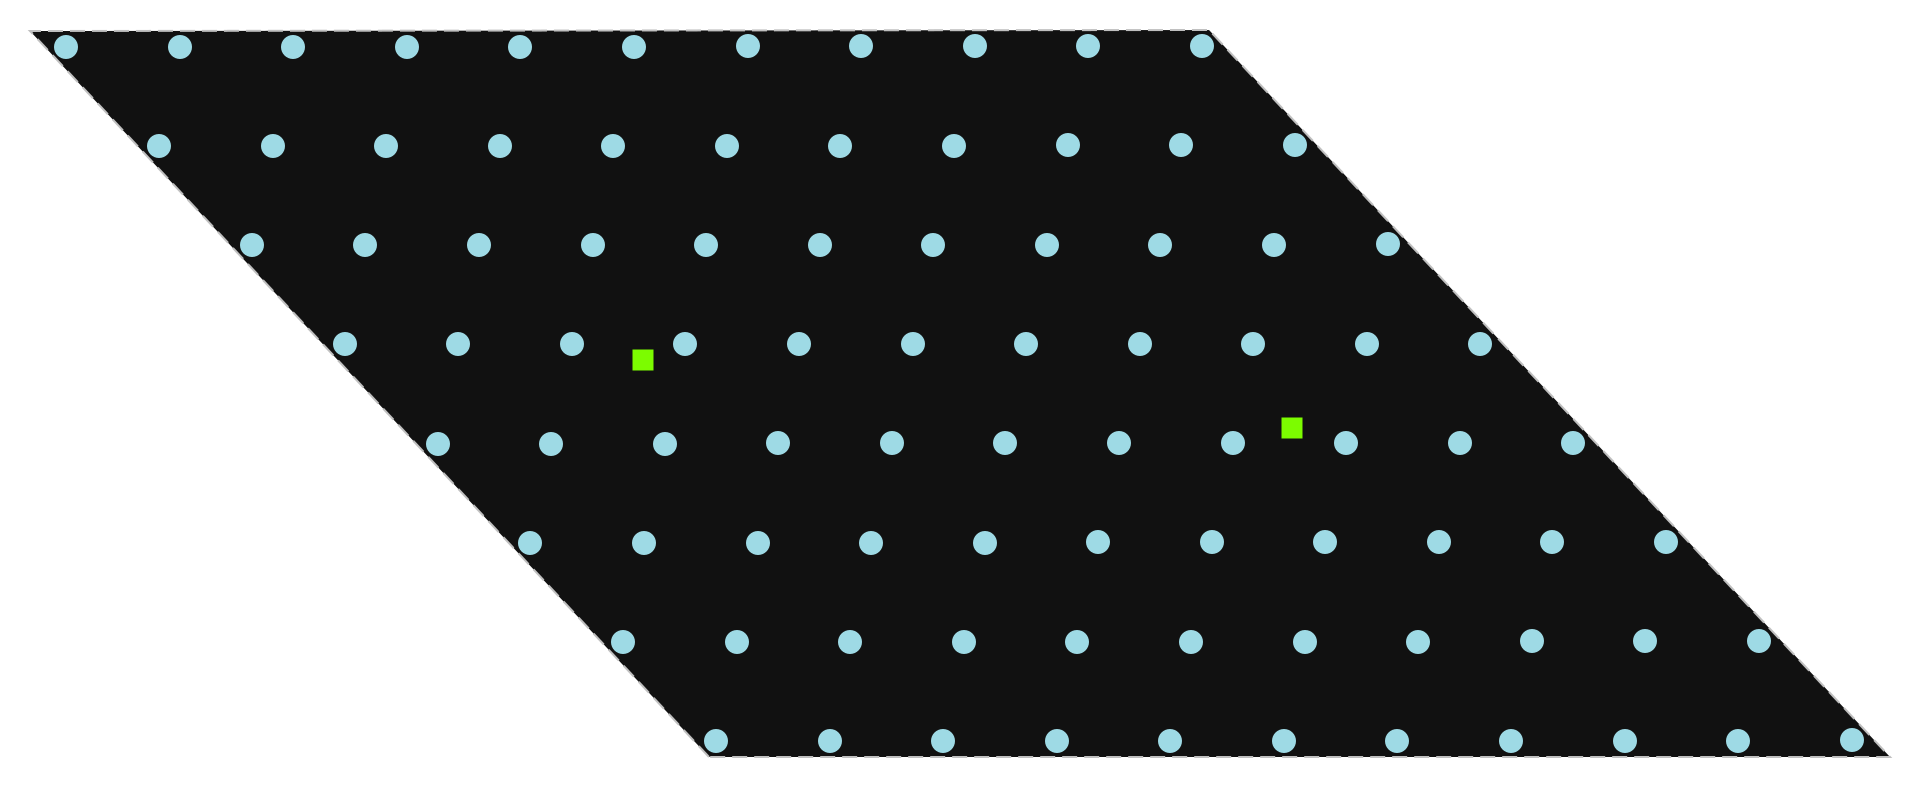

In [6]:
svgplot(L)

### Optimize Sheringham Shoal

In [7]:
P, A = make_planar_embedding(L)

Initial heuristic solution to warm-start the solver:

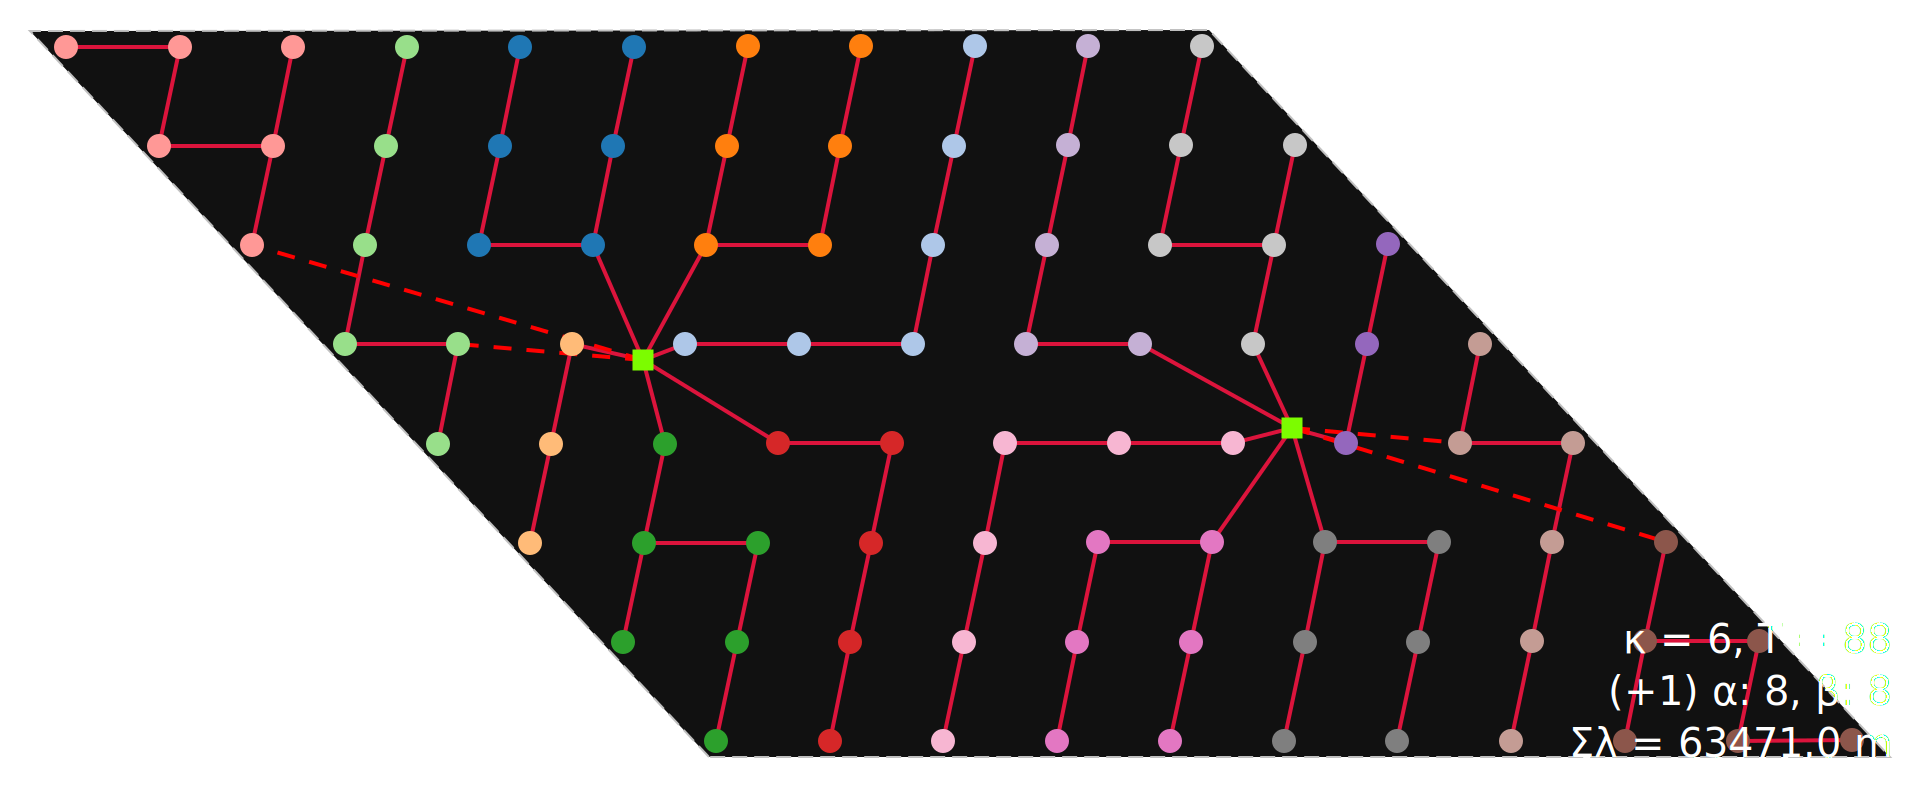

In [8]:
Sʹ = EW_presolver(A, capacity=capacity)
Gʹ = G_from_S(Sʹ, A)
svgplot(Gʹ)

In [9]:
model = omo.make_min_length_model(
    A, capacity,
    gateXings_constraint=False,
    branching=True,
    gates_limit=False
)
omo.warmup_model(model, Sʹ);

In [10]:
sciper.options.update({
    'limits/gap': 0.005,
    'limits/time': 180.,
    'display/freq': 0.5,
    # this is currently useless, as pyomo is not calling the concurrent solver
    'parallel/maxnthreads': 16,
})

In [12]:
result = sciper.solve(model, tee=True)

executable, which is required for solver scip


ApplicationError: No executable found for solver 'scip'

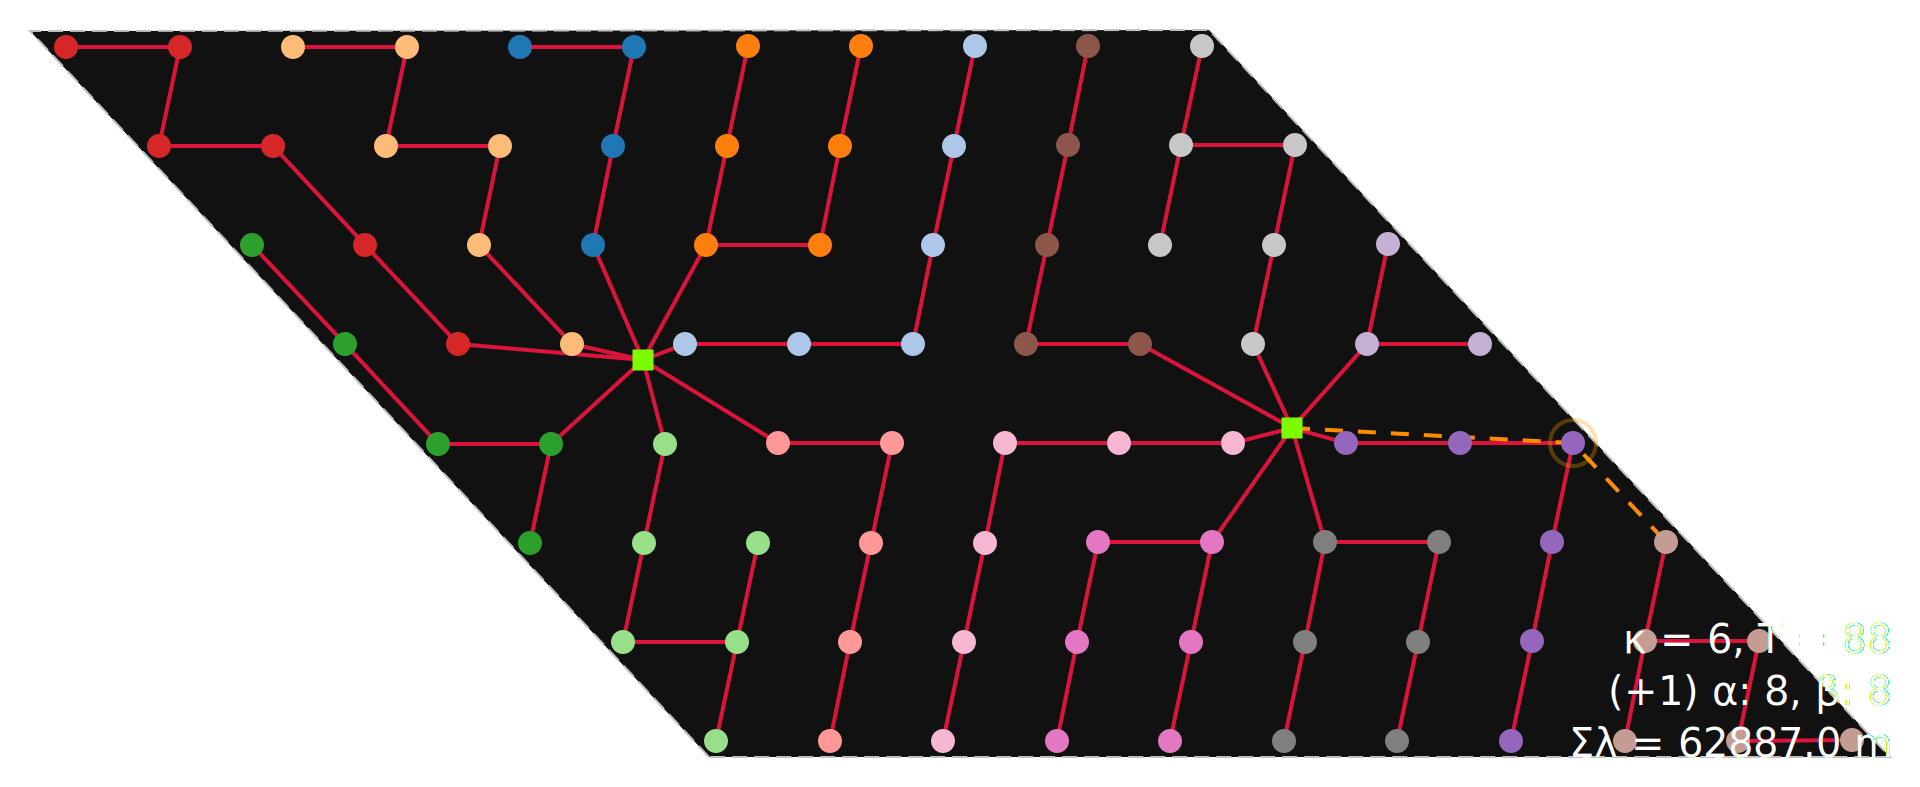

In [ ]:
S = omo.S_from_solution(model, sciper, result)
G = G_from_S(S, A)
H = PathFinder(G, planar=P, A=A).create_detours()
svgplot(H)